In [12]:
# HIDDEN
# For Tables reference see http://data8.org/datascience/tables.html
# This useful nonsense should just go at the top of your notebook.
from datascience import *
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
plots.rc('lines', linewidth=2, color='r')
from ipywidgets import interact
# datascience version number of last run of this notebook
version.__version__

'0.15.0'

In [13]:
# The following is a bunch of code to make data presentation simple.  Skip it for reading.
import sys
sys.path.append("..")
from timetable import TimeTable

import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

import power
import datetime
from os import path

In [32]:
def addsite(site, sites, models, model_perr):
    try :
        v = ucb.view(site, 'Building_Power_Demand_Sensor')
        ts, md = v.getday(day)
    except :
        print(site, "failed to fetch")
        return
    p_5 = power.low(ts['kW'])
    p_ave = np.mean(ts['kW'])
    p_95 = power.high(ts['kW'])
    try :
        params, perr = power.loadfit(ts, p_5, p_95)
        ts['model'] = ts.apply(power.loadmodel(*params), 'hour')
        sites[site] = ts
        summary = [site, p_5, p_ave, p_95] + list(params)
        print(summary)
        models.append(summary)
        model_perr.append([site] + list(perr))
    except :
        print(site, "Fetched but model failed")

In [30]:
day = "2019-04-09"

In [18]:
ucb = power.CampusPower('https://campus-export.xbos.io')

In [ ]:
sites = {}
models = Table(['site', 'p5', 'pave', 'p95', 't1', 't2', 't3', 't4', 'p_lo', 'p_hi'])
model_perr = Table(['site', 't1', 't2', 't3', 't4', 'p_lo', 'p_hi'])

In [33]:
for site in ucb.sites():
    if not site in models['site'] :
        addsite(site, sites, models, model_perr)

Anthony Hall failed to fetch
Art Museum failed to fetch
California Hall failed to fetch
Davis Hall failed to fetch
Dwinelle Hall failed to fetch
Etcheverry Hall failed to fetch
Giannini Hall failed to fetch
Haas Clubhouse failed to fetch
Haviland Hall failed to fetch
Hearst Gym failed to fetch
Hearst Mining Building failed to fetch
Hilgard Hall failed to fetch
Hudson Rugby Field House failed to fetch
Kroeber Hall Fetched but model failed
Lewis Hall failed to fetch
Li Ka Shing failed to fetch
Lower Hearst Parking Structure failed to fetch
ML King Eshleman and 2401 Bancroft failed to fetch
Men's Faculty Club failed to fetch
Minor Addition failed to fetch
Northwest Animal Facility failed to fetch
Parking B and Tennis Courts failed to fetch
Sproul Hall failed to fetch
Strawberry Canyon Center failed to fetch
Tolman Hall failed to fetch
University Hall failed to fetch
Valley Life Sciences failed to fetch
Wellman Hall failed to fetch
Zellerbach Hall failed to fetch


In [39]:
models

site,p5,pave,p95,t1,t2,t3,t4,p_lo,p_hi
2000 Carleton Street,87.0285,132.534,206.32,4.94181,6.54701,13.2944,17.6261,93.1938,189.347
2200 Bancroft Way,7.12,13.1261,25.642,8.47166,9.67346,11.1285,19.5843,8.77166,25.2373
2251 College Avenue,12.254,14.6299,18.7247,7.86282,9.5,14.9997,22.8215,12.9252,16.8925
Barker Hall,287,341.737,475.6,8.91284,13.8044,17.75,21.1108,292.451,436.597
Barrows Hall,117.504,178.766,235.008,5.93837,9.96684,18.0817,24,118.473,227.887
Bechtel Center,21,60.6842,98.3,5.0507,9.5,18.4407,24,24.099,86.5367
Boalt and Simon Hall,41.3422,100.195,144,5.35604,8.87434,19.9869,24,49.3673,131.359
Botanical Garden,32,36.3579,42,3.98977,9.19936,13,18.7564,33.2796,40.975
Chavez Center,77,123.011,170.9,5.16676,7.5915,16.8191,22.9811,83.625,152.811
Cory Hall New (as of 1/12/12),457.6,525.732,599.8,5.65483,10.3542,18.1564,24,457.6,583.906


In [36]:
models.num_rows

48

In [41]:
models['hi/lo'] = models['p_hi']/models['p_lo']

In [42]:
models.sort('pave', descending=True).show()

site,p5,pave,p95,t1,t2,t3,t4,p_lo,p_hi,hi/lo
SRB1 and Oxford Tract,1958.6,2185.82,2389.2,5.71877,9.58158,17.75,23.9965,2009.52,2327.01,1.15799
Stanley Hall,1368,1463.39,1572.82,7.15222,11.7258,17.5,24,1380.74,1554.32,1.12572
Sutardja Dai Hall,912.8,956.811,1021,4.24999,13.7211,16.6615,20.6503,922.865,1006.21,1.09032
Haas Pavilion,320,530.156,834.5,6.57763,8.04264,18.8869,20.094,342.829,704.477,2.05489
Cory Hall New (as of 1/12/12),457.6,525.732,599.8,5.65483,10.3542,18.1564,24,457.6,583.906,1.27602
Soda Hall New (as of 1/12/12),417.196,478.484,527.956,6,16.1026,22.6711,24,432.302,522.447,1.20852
Energy Biosciences Building,345.6,433.637,506.88,4.41193,11.2279,20,24,357.528,485.002,1.35654
Haas School of Business,197.7,342.611,454.9,3.4876,10.6201,18.159,24,208.059,435.933,2.09524
Barker Hall,287,341.737,475.6,8.91284,13.8044,17.75,21.1108,292.451,436.597,1.49289
Simpson Center,219,284.284,360.2,4.57348,12.3275,14.75,22.9956,232.05,351.075,1.51293


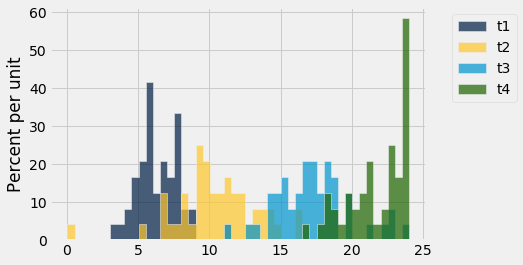

In [46]:
models.select(['t1', 't2', 't3', 't4']).hist(bins=48)

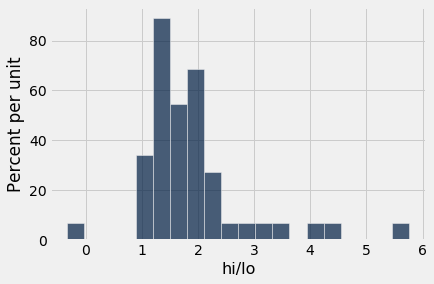

In [49]:
models.select('hi/lo').hist(bins=20)

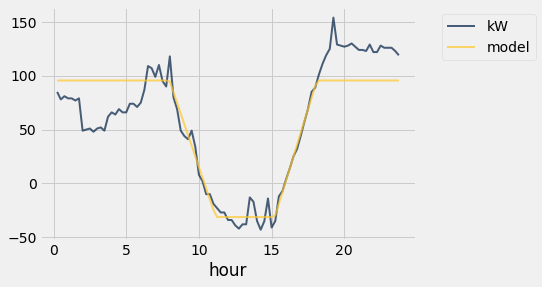

In [52]:
sites['Rec Sports Facility'].plot('hour')

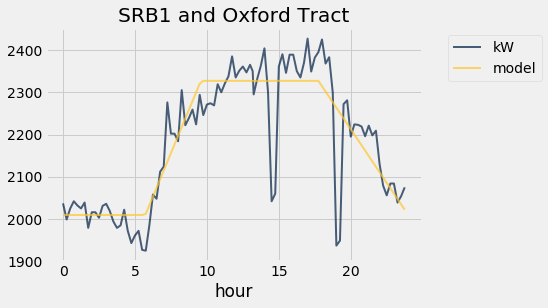

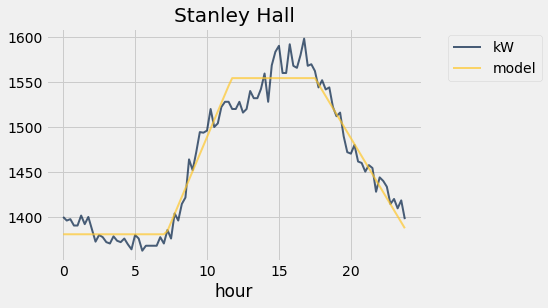

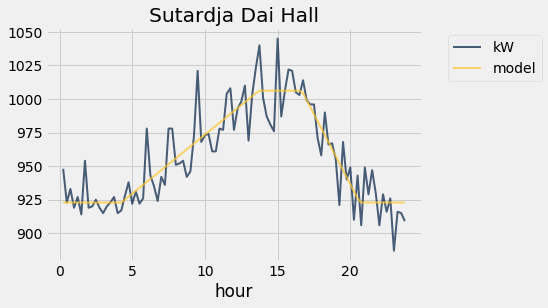

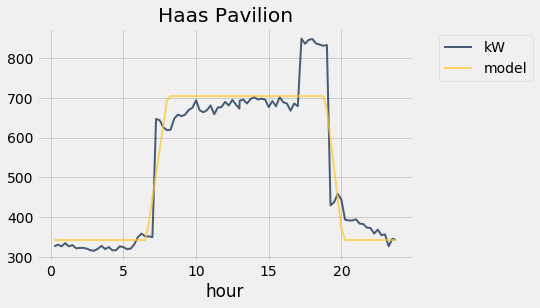

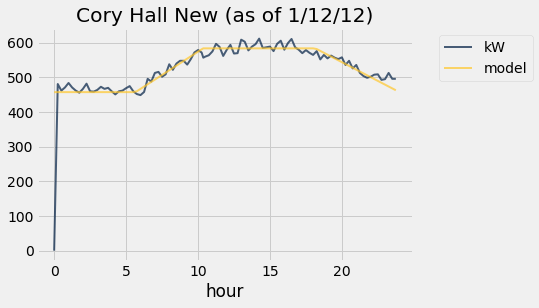

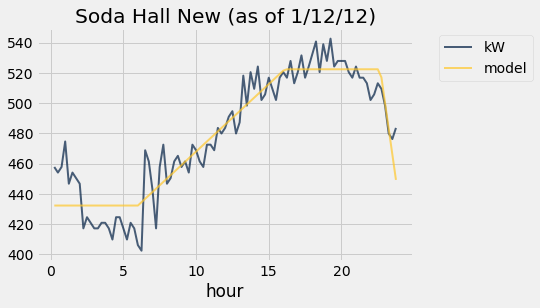

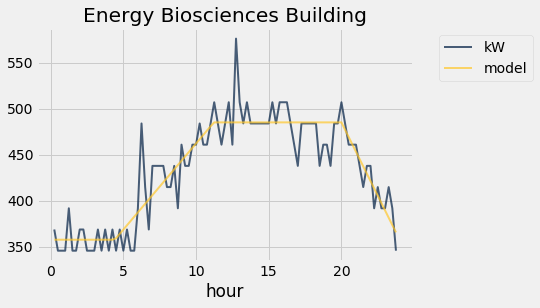

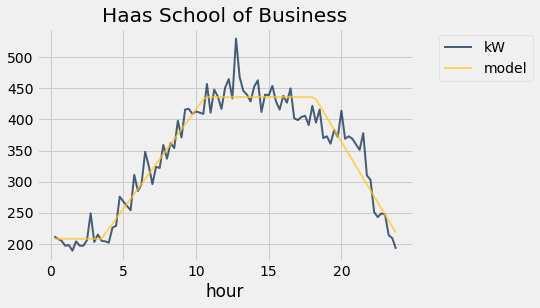

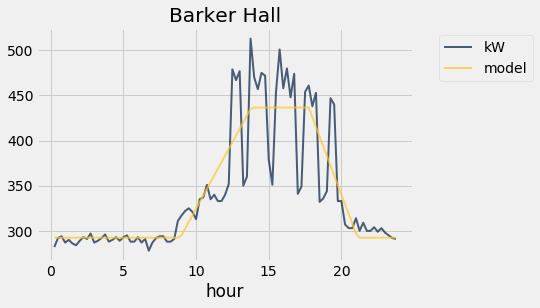

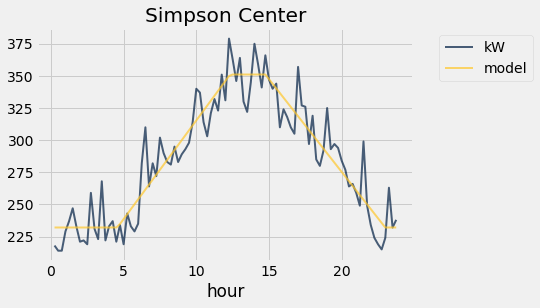

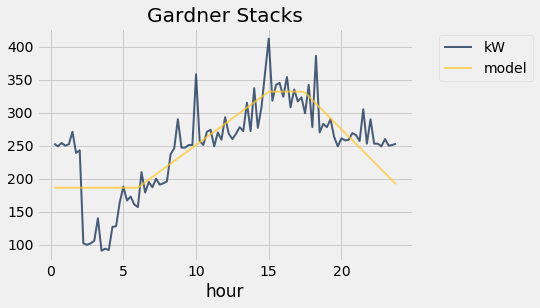

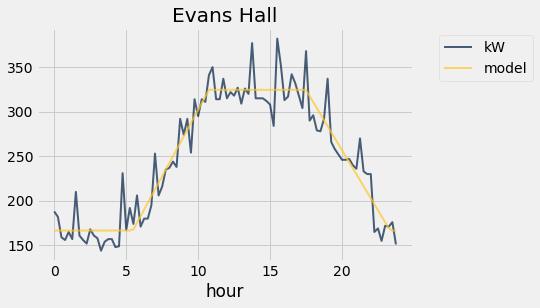

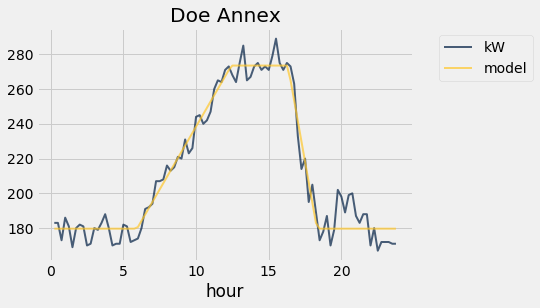

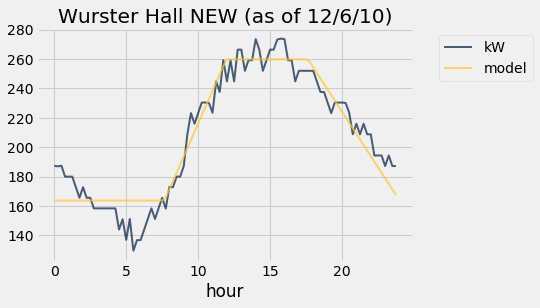

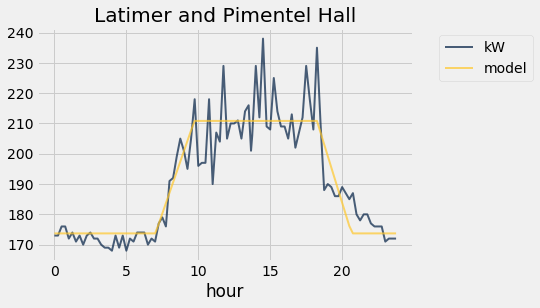

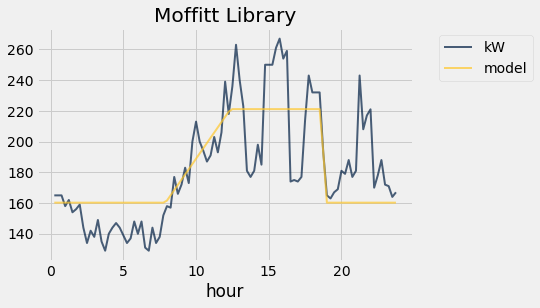

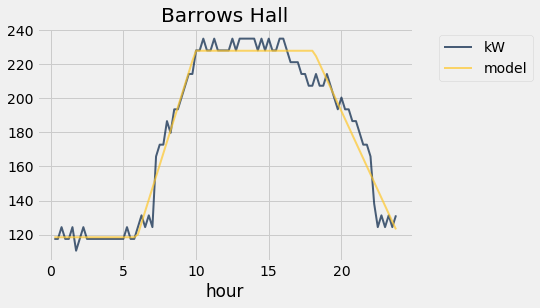

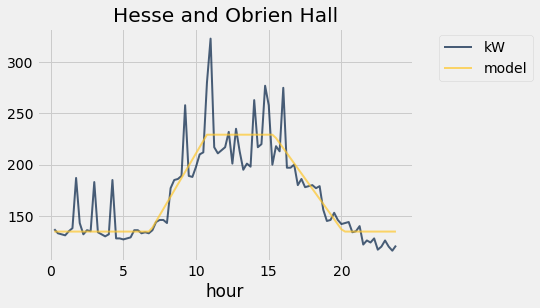

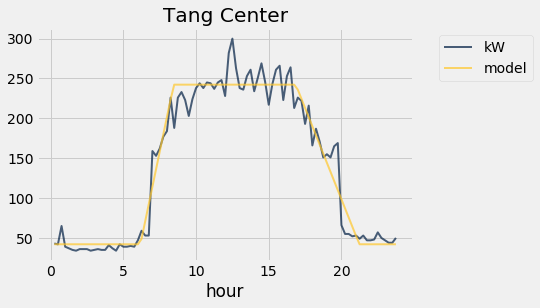

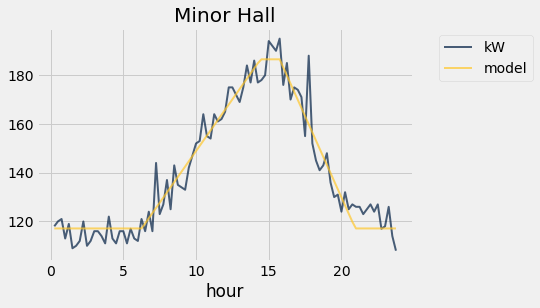

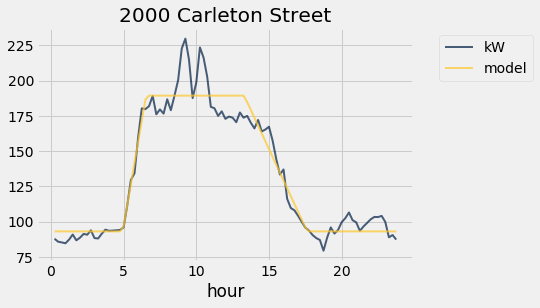

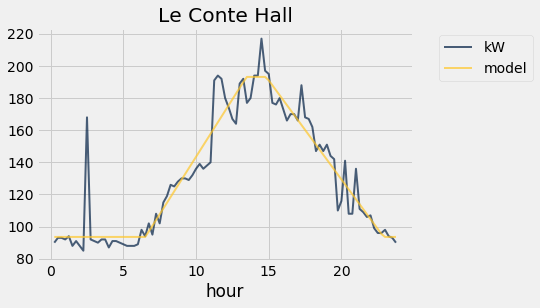

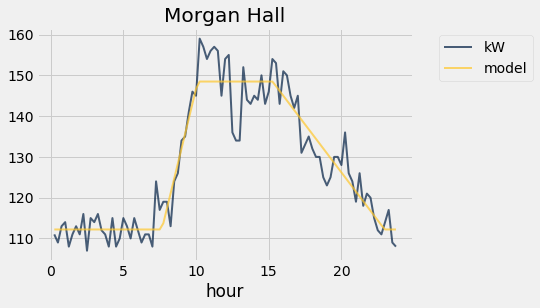

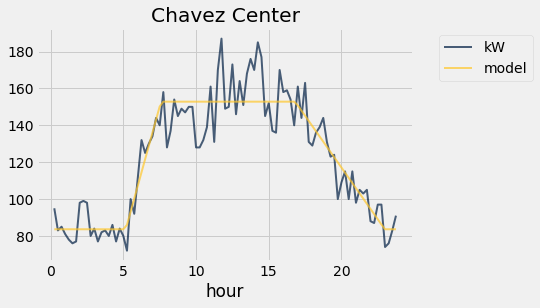

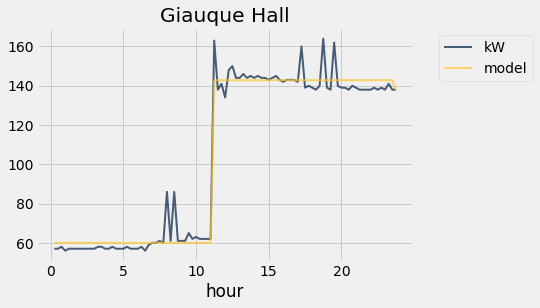

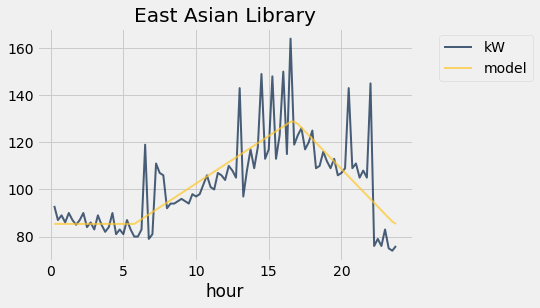

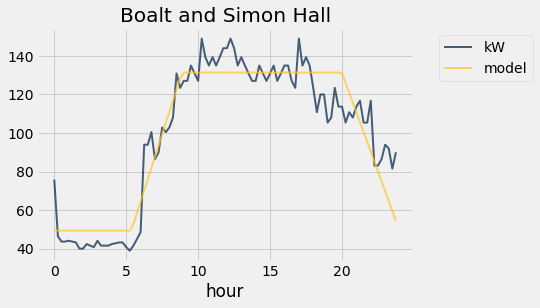

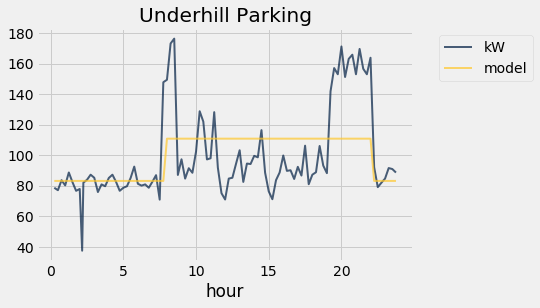

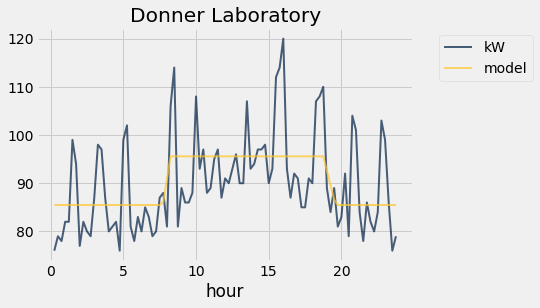

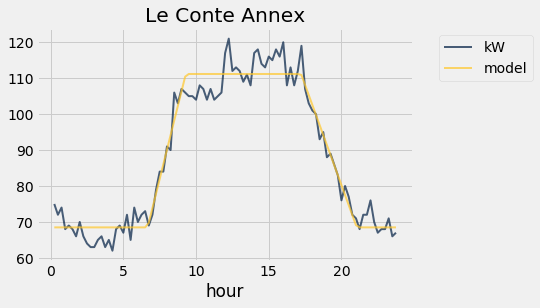

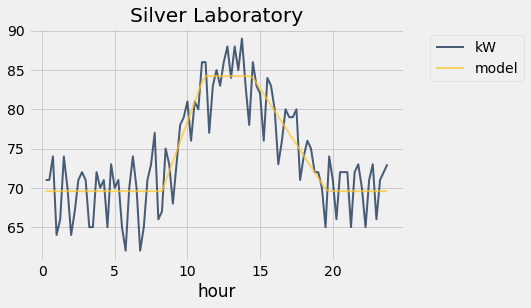

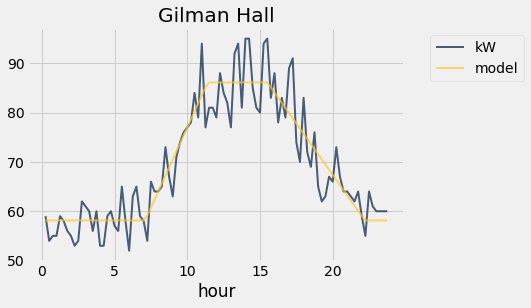

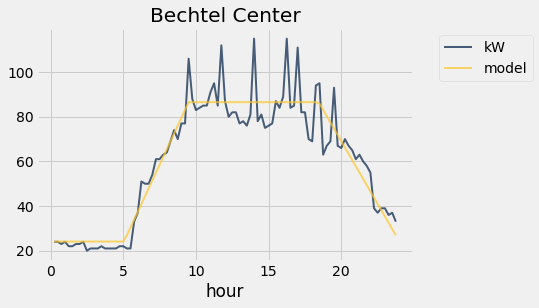

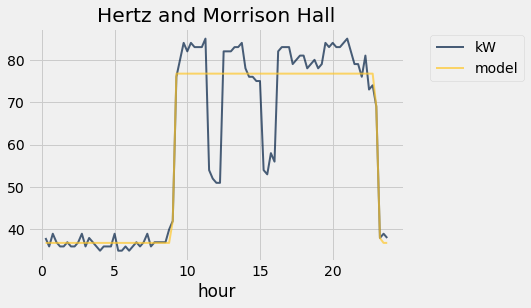

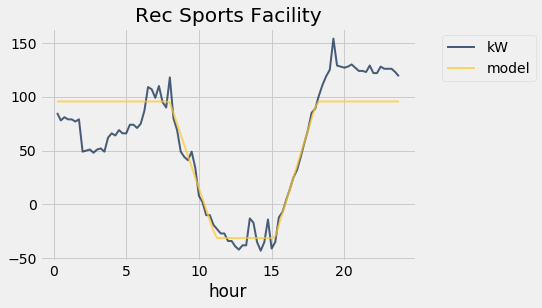

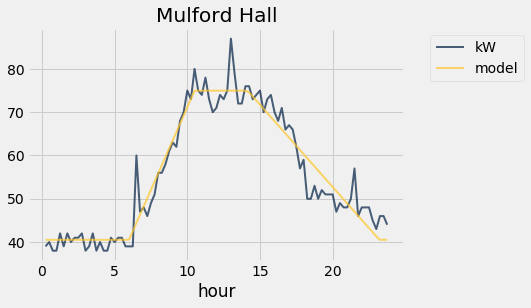

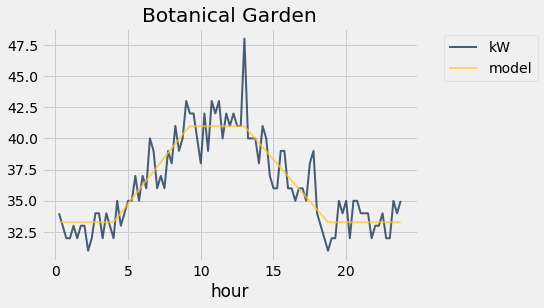

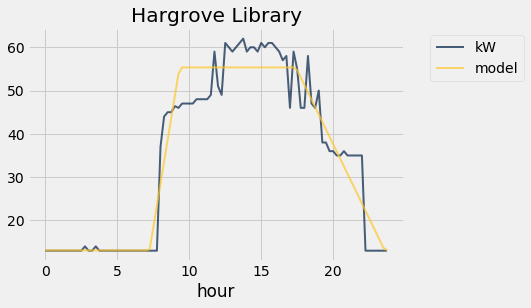

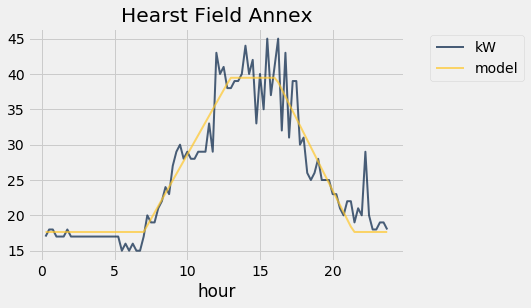

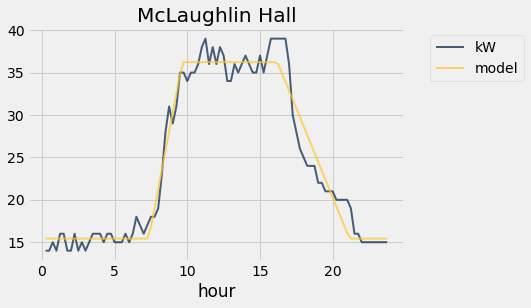

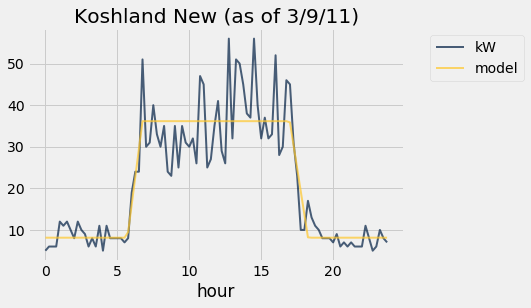

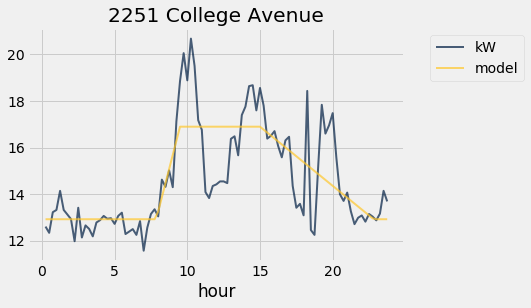

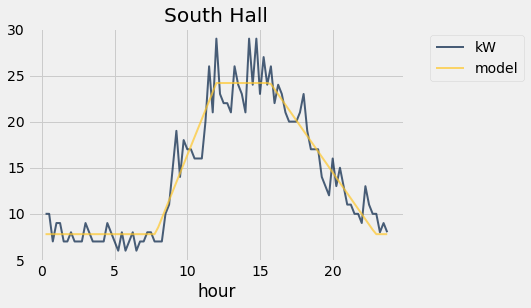

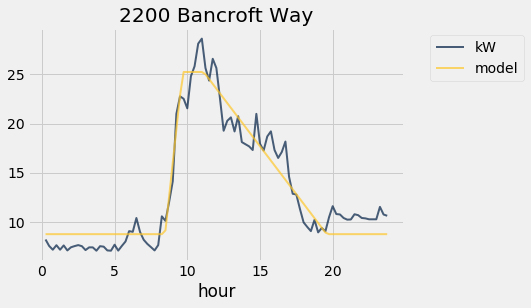

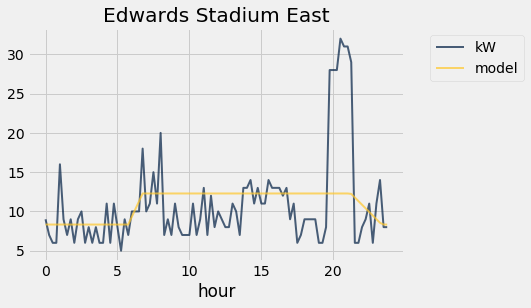

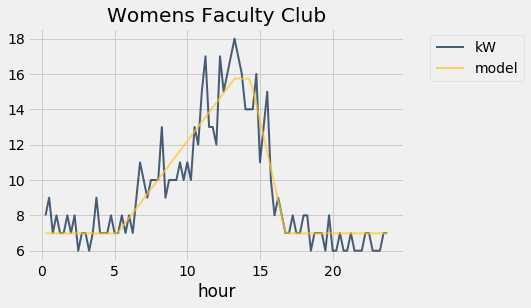

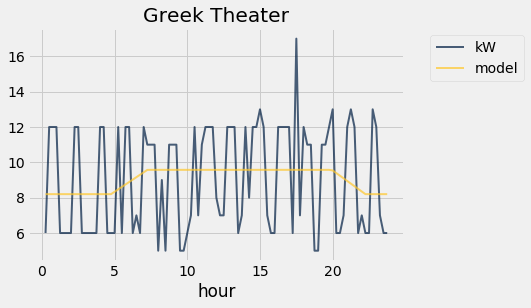

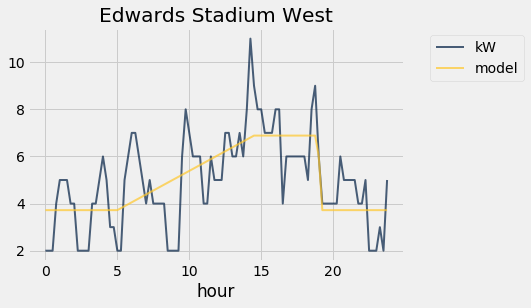

In [55]:
for site in models.sort('pave', descending=True)['site']:
    sites[site].plot('hour')
    plots.title(site)

In [75]:
total = Table(['hour', 'kW']).with_rows([(h,0) for h in np.arange(0.25,24,0.25)])
for (site,pwr) in sites.items():
    print(pwr.num_rows, site)
    #total['kW'] = total['kW'] + pwr['kW']
total

95 2000 Carleton Street
95 2200 Bancroft Way
95 2251 College Avenue
95 Barker Hall
95 Barrows Hall
95 Bechtel Center
96 Boalt and Simon Hall
95 Botanical Garden
95 Chavez Center
97 Cory Hall New (as of 1/12/12)
95 Doe Annex
95 Donner Laboratory
95 East Asian Library
96 Edwards Stadium East
96 Edwards Stadium West
95 Energy Biosciences Building
96 Evans Hall
95 Gardner Stacks
95 Giauque Hall
95 Gilman Hall
95 Greek Theater
96 Haas Pavilion
95 Haas School of Business
96 Hargrove Library
95 Hearst Field Annex
95 Hertz and Morrison Hall
95 Hesse and Obrien Hall
97 Koshland New (as of 3/9/11)
97 Latimer and Pimentel Hall
95 Le Conte Annex
95 Le Conte Hall
95 McLaughlin Hall
95 Minor Hall
95 Moffitt Library
95 Morgan Hall
95 Mulford Hall
95 Rec Sports Facility
97 SRB1 and Oxford Tract
95 Silver Laboratory
95 Simpson Center
94 Soda Hall New (as of 1/12/12)
95 South Hall
95 Stanley Hall
95 Sutardja Dai Hall
95 Tang Center
96 Underhill Parking
95 Womens Faculty Club
96 Wurster Hall NEW (as of 1

hour,kW
0.25,0
0.5,0
0.75,0
1,0
1.25,0
1.5,0
1.75,0
2,0
2.25,0
2.5,0


In [77]:
sites['Koshland New (as of 3/9/11)']['hour']

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 12.9 , 13.  ,
       13.25, 13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25,
       15.5 , 15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 ,
       17.75, 18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75,
       20.  , 20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  ,
       22.25, 22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75])